In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
sc.install_pypi_package("pandas==0.25.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1607322711004_0011,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

In [2]:
sc.install_pypi_package("matplotlib")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/30/f2/10c822cb0ca5ebec58bd1892187bc3e3db64a867ac26531c6204663fc218/matplotlib-3.3.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/af/fa/c1302a26d5e1a17fa8e10e43417b6cf038b0648c4b79fcf2302a4a0c5d30/Pillow-8.0.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d2/46/231de802ade4225b76b96cffe419cf3ce52bbe92e3b092cf12db7d11c207/kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl

In [3]:
sc.install_pypi_package("sklearn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/f4/cb/64623369f348e9bfb29ff898a57ac7c91ed4921f228e9726546614d63ccb/scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/7e/8f6a79b102ca1ea928bae8998b05bf5dc24a90571db13cd119f275ba6252/scipy-1.5.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl

In [4]:
sc.install_pypi_package("seaborn")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/bc/45/5118a05b0d61173e6eb12bc5804f0fbb6f196adb0a20e0b16efc2b8e98be/seaborn-0.11.0-py3-none-any.whl

In [89]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns
import pandas as pd

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
spark = SparkSession.builder.appName('breast-cancer-analysis').getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
lrEval = BinaryClassificationEvaluator()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
df = spark.read.csv('data.csv', header = True, inferSchema = True)
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

In [58]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9       130     77.58     135.1
area_mean                    1001      1326      1203     386.1      1297
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0

In [59]:
df.toPandas().groupby(['diagnosis']).size()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

diagnosis
B    357
M    212
dtype: int64

In [60]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']
df.select(numeric_features).describe().toPandas().transpose()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                             0                      1  ...         3        4
summary                  count                   mean  ...       min      max
radius_mean                569     14.127291739894563  ...     6.981    28.11
texture_mean               569      19.28964850615117  ...      9.71    39.28
perimeter_mean             569      91.96903339191566  ...     43.79    188.5
area_mean                  569      654.8891036906857  ...     143.5   2501.0
smoothness_mean            569      0.096360281195079  ...   0.05263   0.1634
compactness_mean           569    0.10434098418277686  ...   0.01938   0.3454
concavity_mean             569    0.08879931581722322  ...       0.0   0.4268
concave points_mean        569   0.048919145869947236  ...       0.0   0.2012
symmetry_mean              569      0.181161862917399  ...     0.106    0.304
fractal_dimension_mean     569    0.06279760984182778  ...   0.04996  0.09744
radius_se                  569     0.4051720562390161  ...    0.

In [61]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:

df = df.select(
               'radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', "diagnosis",
               'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
               'texture_se', 'perimeter_se',  'smoothness_se', 'compactness_se', 'concavity_se', 
               'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
               'perimeter_worst',  'smoothness_worst', 'compactness_worst', 'concavity_worst',
               'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'area_mean', 'area_se', 'area_worst'
)
cols = df.columns
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radius_worst: double (nullable = true)
 |-- texture_worst: double (nullable = true)
 |-- perimeter_worst: double (nulla

In [63]:
stages = []
categoricalColumns = ['diagnosis']

label_stringIdx = StringIndexer(inputCol = 'diagnosis', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
               'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
               'texture_se', 'perimeter_se',  'smoothness_se', 'compactness_se', 'concavity_se', 
               'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
               'perimeter_worst',  'smoothness_worst', 'compactness_worst', 'concavity_worst',
               'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'area_mean', 'area_se', 'area_worst'
              ]
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + cols
df = df.select(selectedCols)
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radius_worst: double (nullable = true)
 |

In [65]:
pdf = pd.DataFrame(df.take(5), columns=df.columns)
pdf.iloc[:,0:2] 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   label                                           features
0    1.0  [17.99, 10.38, 122.8, 0.1184, 0.2776, 0.3001, ...
1    1.0  [20.57, 17.77, 132.9, 0.08474, 0.07864, 0.0869...
2    1.0  [19.69, 21.25, 130.0, 0.1096, 0.1599, 0.1974, ...
3    1.0  [11.42, 20.38, 77.58, 0.1425, 0.2839, 0.2414, ...
4    1.0  [20.29, 14.34, 135.1, 0.1003, 0.1328, 0.198, 0...

In [66]:
df = df.repartition(100, 'radius_mean')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [67]:
train, test = df.randomSplit([0.7, 0.1], seed = 60616)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Training Dataset Count: 497
Test Dataset Count: 72

In [97]:
## confusion matrix function

def cm(y_true, y_pred):
    cf_matrix = confusion_matrix(y_true, y_pred)
    plt.clf()
    sns.heatmap(cf_matrix, annot=True, fmt='', xticklabels=['B', 'M'], yticklabels=['B', 'M'], cmap = "Blues")
    plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [69]:
## accuracy, precision, recall, f1_score

def eval_metrics(y_true, y_pred):
    accuracy_score_val = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    recall = 2 * ((precision * recall) / (precision + recall))
    
    return accuracy_score_val, precision, recall

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Logistic Regression Model

In [96]:
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

trainingSummary = lrModel.summary
lrROC = trainingSummary.roc.toPandas()
lrPreds = lrModel.transform(test)

predicted_values = lrPreds.select('prediction')
true_values = test.select('label')

y_pred = pd.DataFrame(predicted_values.take(test.count()), columns=['prediction'])
y_true = pd.DataFrame(true_values.take(test.count()), columns=['label'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Logistic Regression evaluation

### Confusion Matrix

In [98]:
cm(y_true, y_pred)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

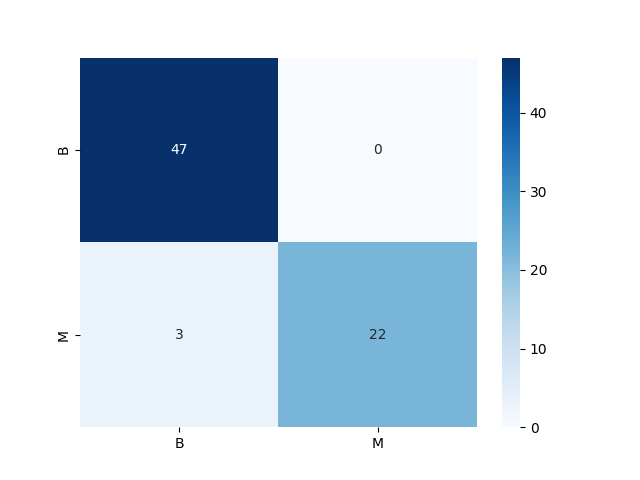

In [99]:
%matplot plt

In [73]:
### Accuracy, Precision, Recall, F1 score

accuracy, precision, recall, f1_score = eval_metrics(y_true, y_pred)

print('Logistics Regression Analysis, Accuracy {}, Precision {}, Recall {}, F1 measure {} '.format(accuracy,
                                                                                precision, recall, f1_score))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Logistics Regression Analysis, Accuracy 0.9583333333333334, Precision 1.0, Recall 0.9361702127659575, F1 measure 0.9361702127659575

In [74]:
plt.clf()
plt.plot(lrROC['FPR'],lrROC['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve for Logistics Regression for Training')
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

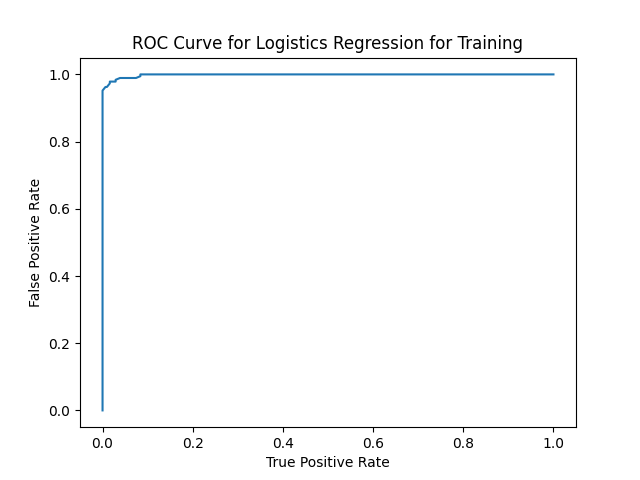

In [76]:
%matplot plt

In [77]:
print('Training set area Under ROC: ' + str(trainingSummary.areaUnderROC))
print('Test Area Under ROC', lrEval.evaluate(lrPreds))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Training set area Under ROC: 0.9985337243401758
Test Area Under ROC 0.9702127659574468

# DecisionTreeClassifier

In [100]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
dtPreds = dtModel.transform(test)

predicted_values = dtPreds.select('prediction')
true_values = test.select('label')

y_pred = pd.DataFrame(predicted_values.take(test.count()), columns=['prediction'])
y_true = pd.DataFrame(true_values.take(test.count()), columns=['label'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## DecisionTreeClassifier Evaluation

In [101]:
cm(y_true, y_pred)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

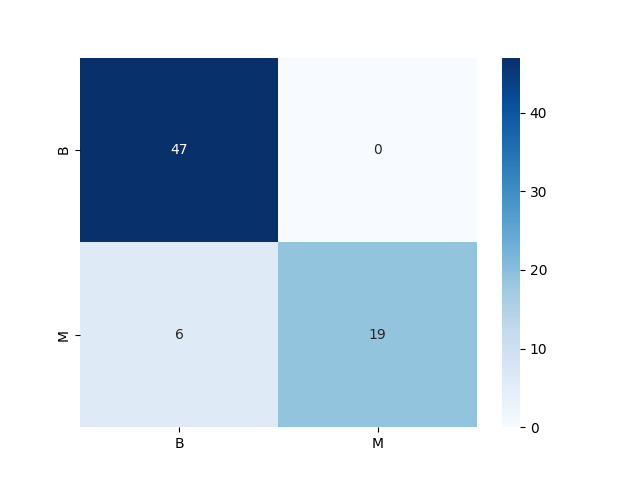

In [102]:
%matplot plt

In [81]:
## accuracy, precision, recall and f1-measure
accuracy, precision, recall, f1_score = eval_metrics(y_true, y_pred)

print('DecisionTreeClassifer Evaluation, Accuracy {}, Precision {}, Recall {}, F1 measure {} '.format(accuracy,
                                                                                precision, recall, f1_score))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DecisionTreeClassifer Evaluation, Accuracy 0.9166666666666666, Precision 1.0, Recall 0.8636363636363636, F1 measure 0.8636363636363636

In [82]:
dtEval = BinaryClassificationEvaluator()
dtROC = dtEval.evaluate(dtPreds, {dtEval.metricName: "areaUnderROC"})

print("Test Area Under ROC: " + str(dtROC))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Area Under ROC: 0.8421276595744681

# RandomForestClassifier

In [103]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
rfPreds = rfModel.transform(test)

predicted_values = rfPreds.select('prediction')
true_values = test.select('label')

y_pred = pd.DataFrame(predicted_values.take(test.count()), columns=['prediction'])
y_true = pd.DataFrame(true_values.take(test.count()), columns=['label'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## RandomForestClassifier Evaluation

In [104]:
## confusion matrix
cm(y_true, y_pred)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

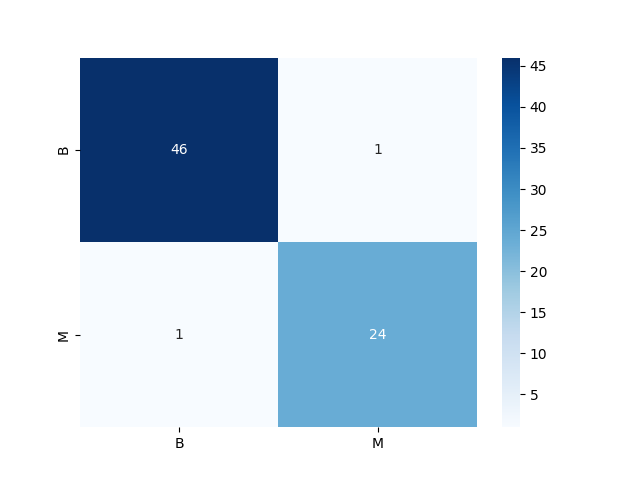

In [105]:
%matplot plt 

In [86]:
## accuracy, precision, recall and f1-measure
accuracy, precision, recall, f1_score = eval_metrics(y_true, y_pred)

print('RandomForestClassifier Evaluation, Accuracy {}, Precision {}, Recall {}, F1 measure {} '.format(accuracy,
                                                                                precision, recall, f1_score))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

RandomForestClassifier Evaluation, Accuracy 0.9722222222222222, Precision 0.96, Recall 0.96, F1 measure 0.96

In [87]:
rfEval = BinaryClassificationEvaluator()
rfROC = rfEval.evaluate(rfPreds, {rfEval.metricName: "areaUnderROC"})
print("Test Area Under ROC: " + str(rfROC))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Area Under ROC: 0.9595744680851062

# Naive Bayes Classifier

In [106]:
nb = NaiveBayes(smoothing=1.0)
nb_model = nb.fit(train)

nb_preds = nb_model.transform(test)

predicted_values = nb_preds.select('prediction')
true_values = test.select('label')

y_pred = pd.DataFrame(predicted_values.take(test.count()), columns=['prediction'])
y_true = pd.DataFrame(true_values.take(test.count()), columns=['label'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Naive Bayes Evaluation

In [107]:
## confusion matrix
cm(y_true, y_pred)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

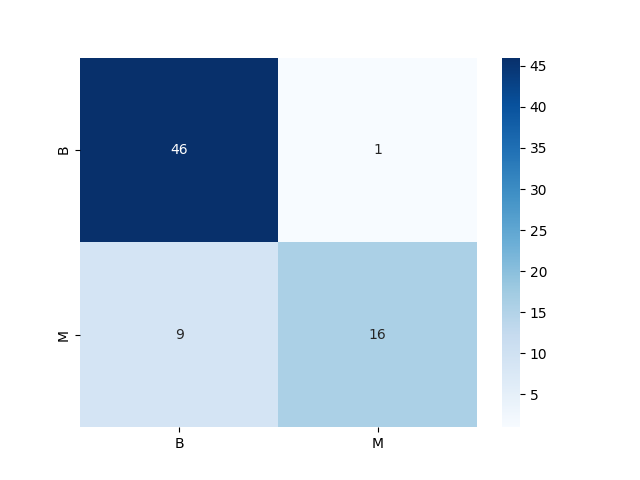

In [108]:
%matplot plt 

In [109]:
## accuracy, precision, recall and f1-measure
accuracy, precision, recall, f1_score = eval_metrics(y_true, y_pred)

print('Naive Bayes Evaluation, Accuracy {}, Precision {}, Recall {}, F1 measure {} '.format(accuracy,
                                                                                precision, recall, f1_score))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Naive Bayes Evaluation, Accuracy 0.8611111111111112, Precision 0.9411764705882353, Recall 0.7619047619047621, F1 measure 0.7619047619047621

In [95]:
rfEval = BinaryClassificationEvaluator()
rfROC = rfEval.evaluate(nb_preds, {rfEval.metricName: "areaUnderROC"})
print("Test Area Under ROC: " + str(rfROC))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Test Area Under ROC: 0.04936170212765958